<a href="https://colab.research.google.com/github/ainejerry/sales-prediction/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author:AINEMUKAMA ERNEST JERRY

## Project Overview

## Load and Inspect Data

In [1]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#loading pandas
import pandas as pd
y='/content/drive/MyDrive/Colab Notebooks/sales_predictions_2023.csv'
df=pd.read_csv(y)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#to get information about the data set provided
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#to display the first five rows of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [5]:
#duplicates in the data set
df.duplicated().sum()

0

In [6]:
#to find the number of missing values in every column
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

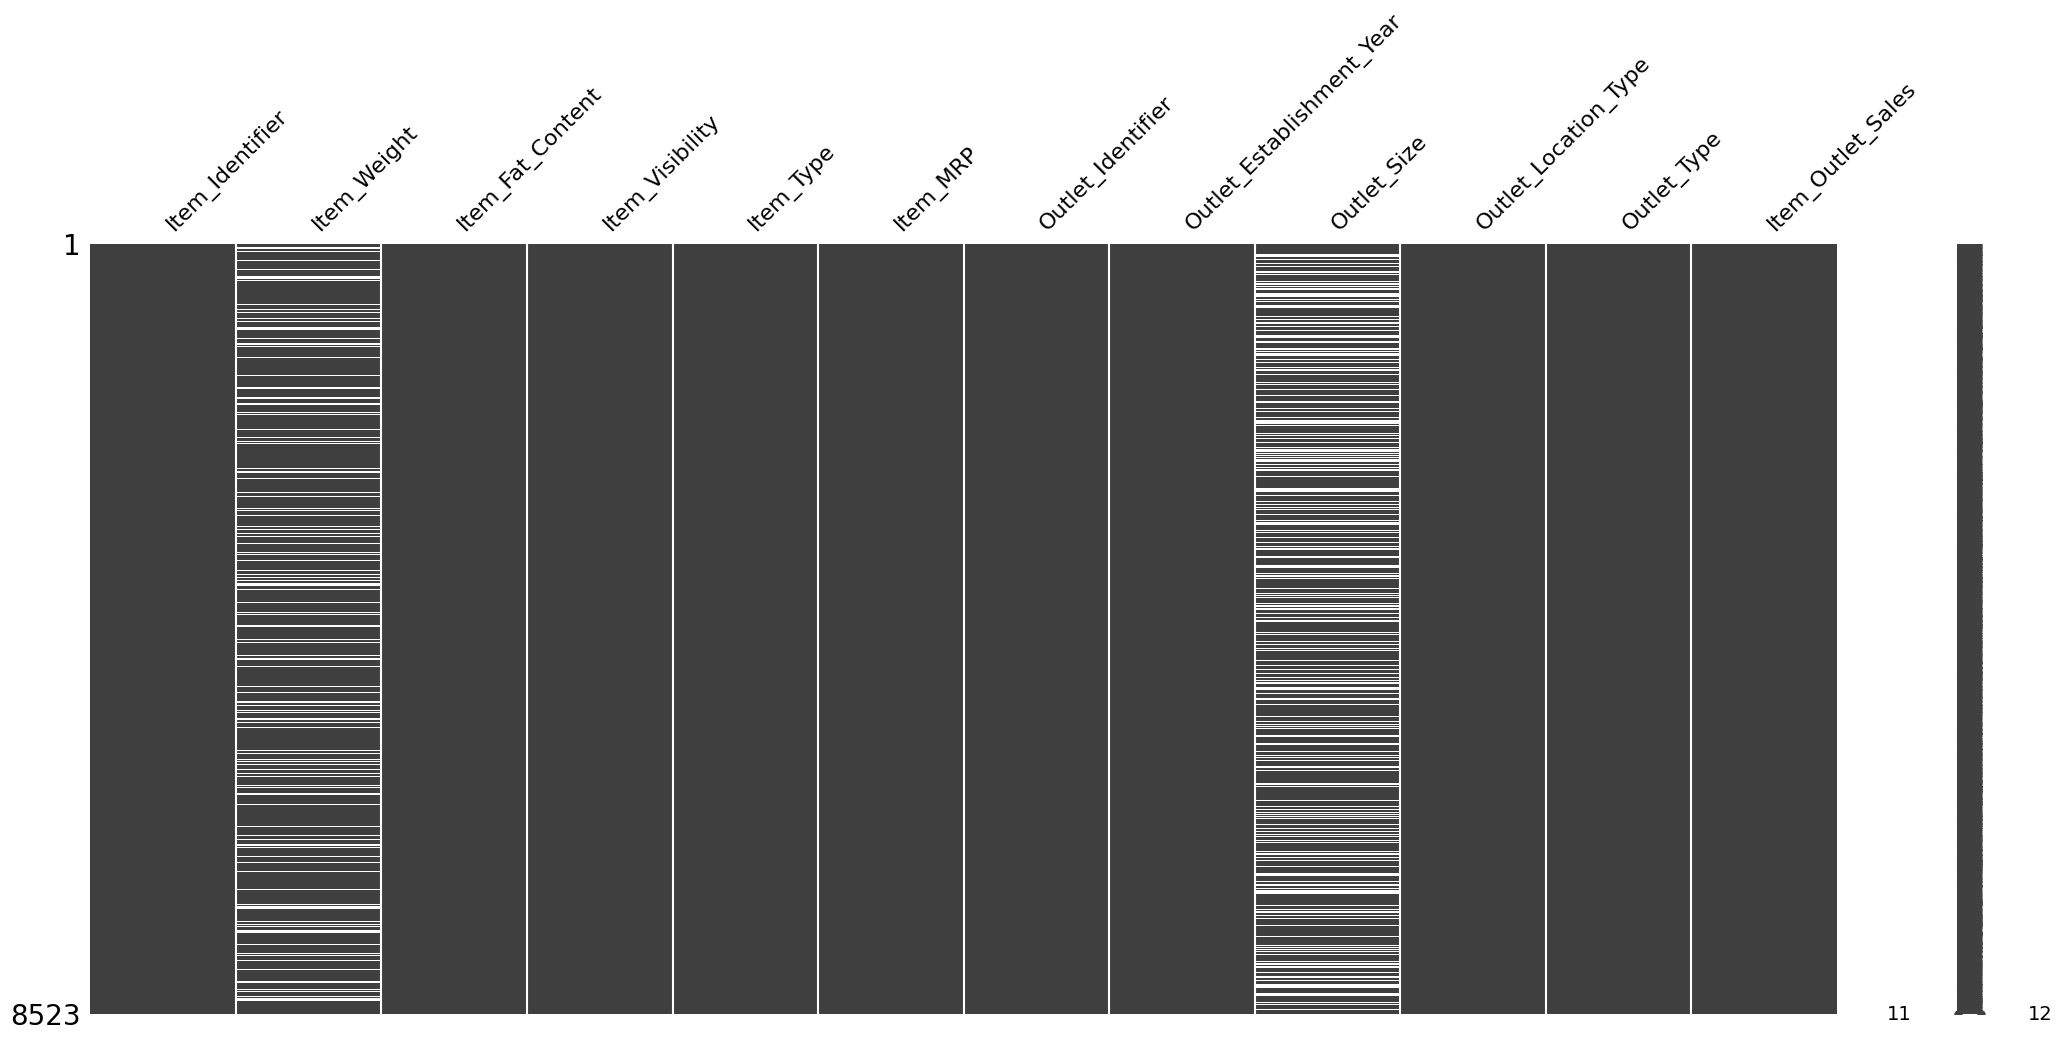

In [7]:
#importing missingno to visualize the null values
import missingno as msno
msno.matrix(df);
#Item_Weight
#Outlet_Size

In [8]:
df['Item_Weight'].fillna('MISSING', inplace=True)
df['Outlet_Size'].fillna('MISSING', inplace=True)

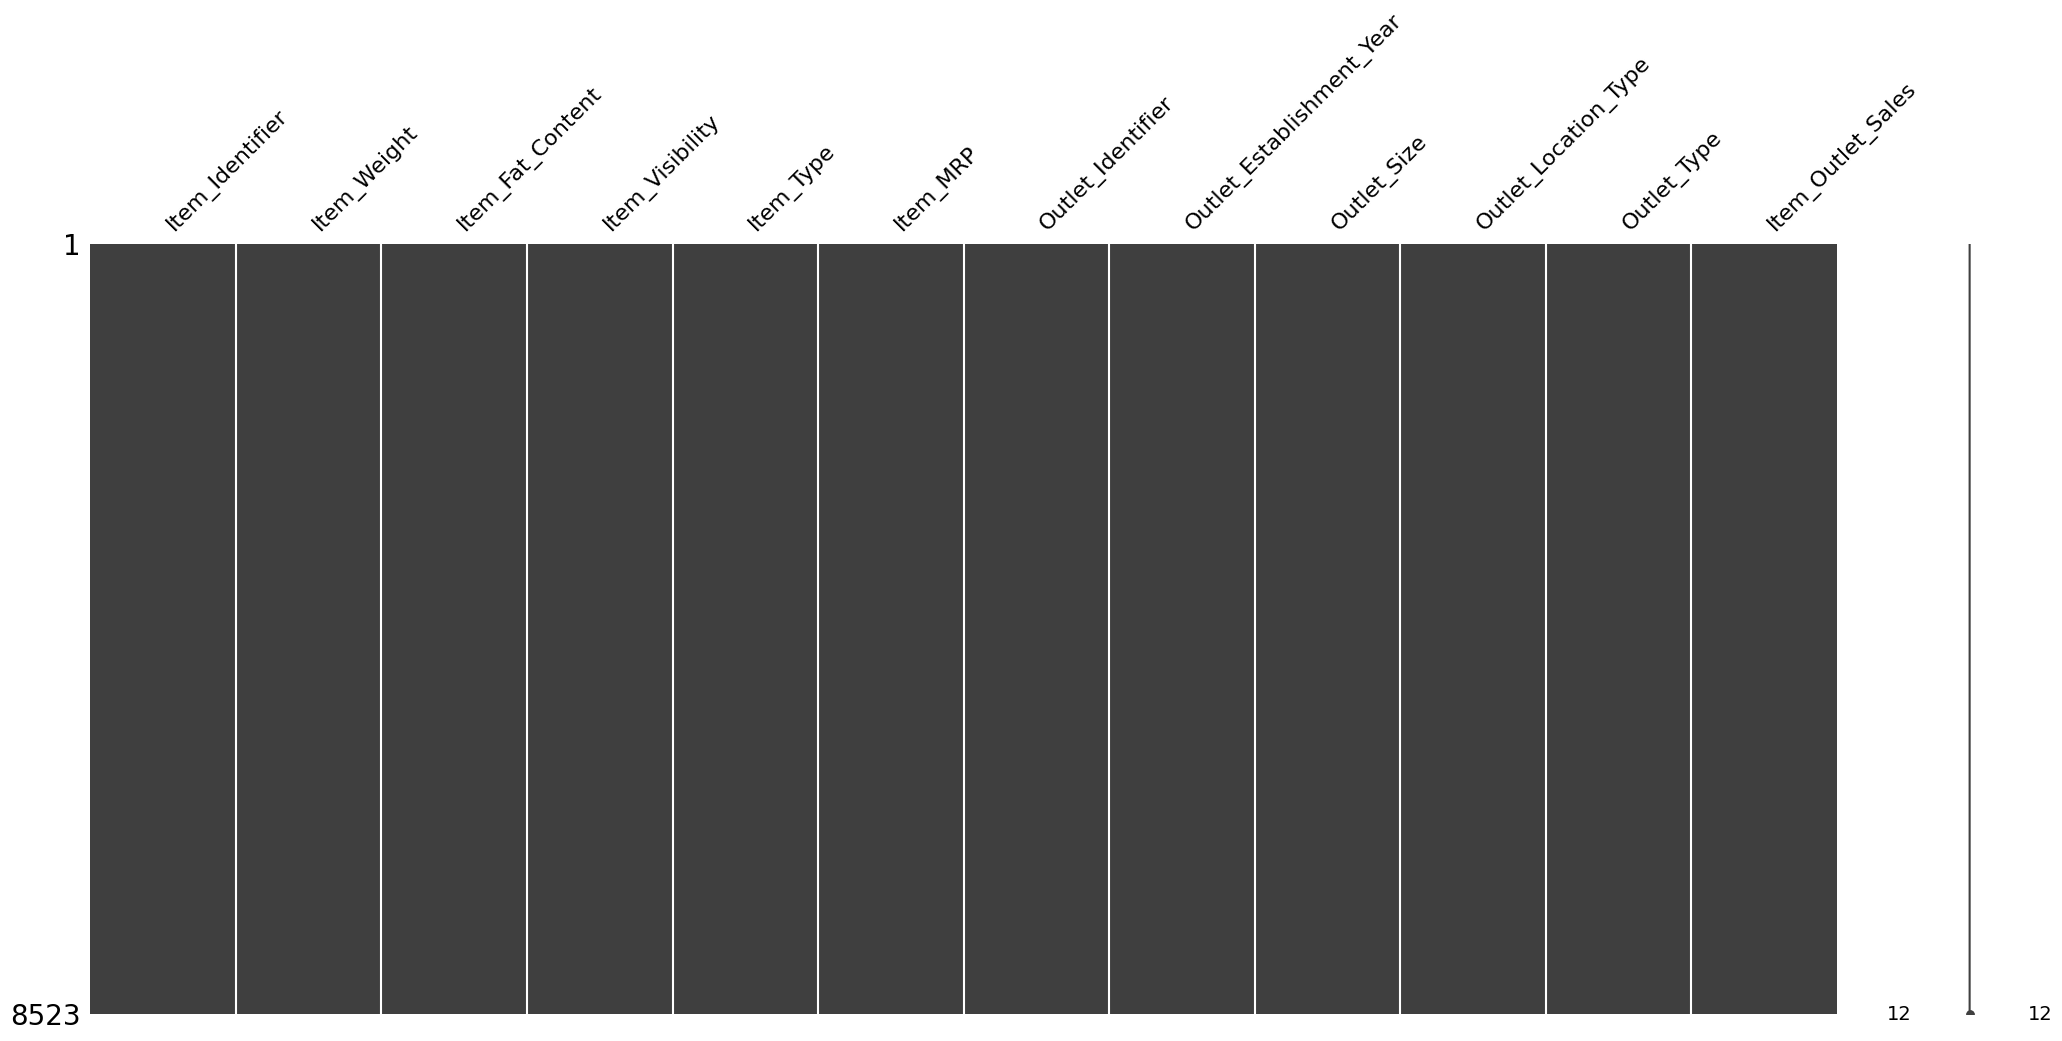

In [9]:
#to confirm the zero null values
msno.matrix(df);

In [10]:
#list of string columns
x=df.select_dtypes('object').columns
x

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [11]:
#to explore the consistency in the string columns
for y in x:
  print(df[y].value_counts())
#Item_Fat_Content

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64


In [12]:
#replacing LF with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
#replacing low fat with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [14]:
#to confirm the changes have been made
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [15]:
#make a list of numerical columns
num_cols = df.select_dtypes(include=[float, int])
num_cols

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.016047,249.8092,1999,3735.1380
1,0.019278,48.2692,2009,443.4228
2,0.016760,141.6180,1999,2097.2700
3,0.000000,182.0950,1998,732.3800
4,0.000000,53.8614,1987,994.7052
...,...,...,...,...
8518,0.056783,214.5218,1987,2778.3834
8519,0.046982,108.1570,2002,549.2850
8520,0.035186,85.1224,2004,1193.1136
8521,0.145221,103.1332,2009,1845.5976


In [16]:
#printing the min,max and mean of the numerical columns
print(num_cols.describe().loc[['min', 'max', 'mean']])

      Item_Visibility    Item_MRP  Outlet_Establishment_Year  \
min          0.000000   31.290000                1985.000000   
max          0.328391  266.888400                2009.000000   
mean         0.066132  140.992782                1997.831867   

      Item_Outlet_Sales  
min           33.290000  
max        13086.964800  
mean        2181.288914  


In [20]:
#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Exploratory Data Analysis

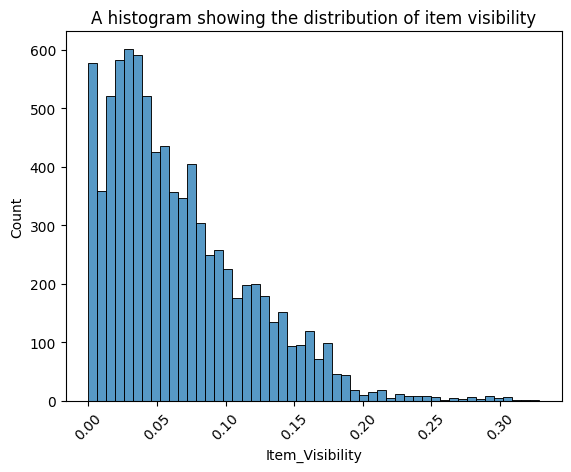

In [31]:
#Histograms to view the distributions of numerical features in the dataset.
#histogram for item visibility
ax = sns.histplot(data=df, x="Item_Visibility")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('A histogram showing the distribution of item visibility');

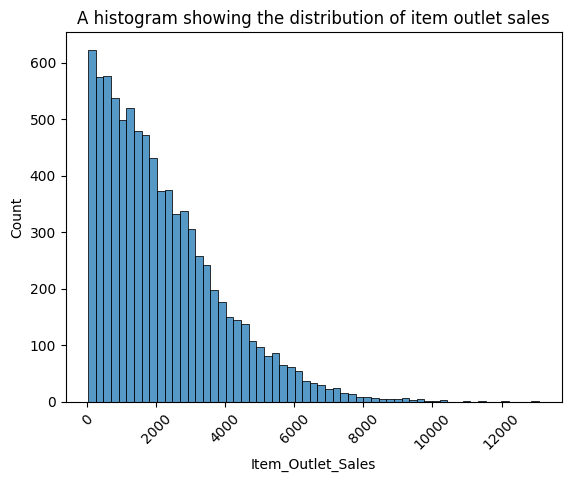

In [28]:
#histogram for item outlet sales
ax = sns.histplot(data=df, x="Item_Outlet_Sales")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('A histogram showing the distribution of item outlet sales');

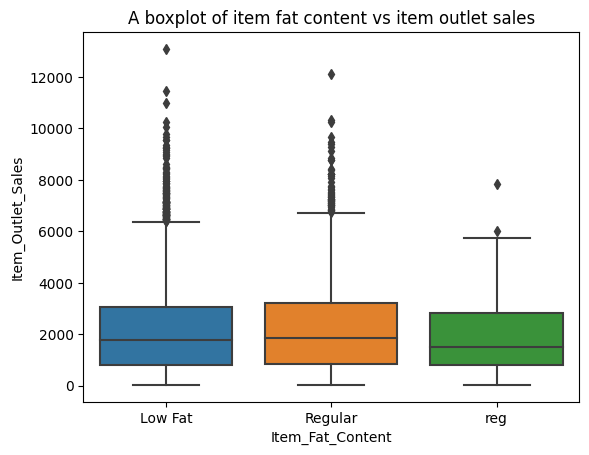

In [37]:
#Boxplots to view statistical summaries of numerical features in the dataset.
#a boxplot of
ax = sns.boxplot(data=df, x='Item_Fat_Content',y='Item_Outlet_Sales')
ax.set_title('A boxplot of item fat content vs item outlet sales');

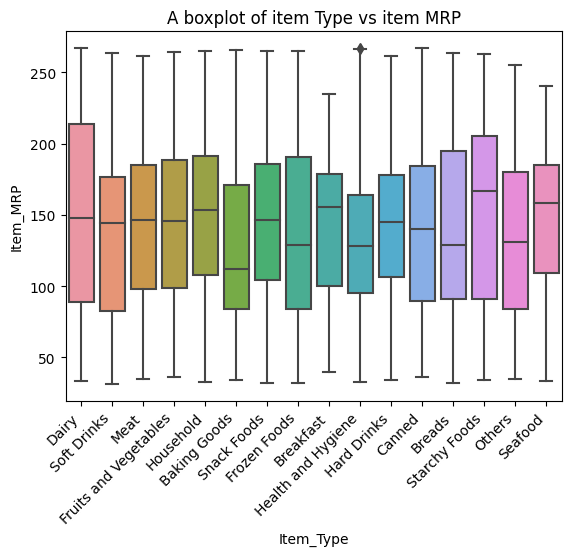

In [59]:
#box plot of item type vs item mrp
ax = sns.boxplot(data=df, x='Item_Type',y='Item_MRP')
ax.set_title('A boxplot of item Type vs item MRP');
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');

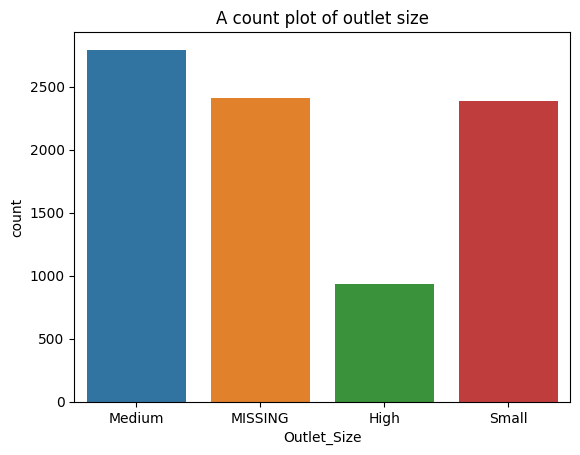

In [55]:
#Countplots to view the frequency of each class of categorial features in the dataset.
#A count plot of outlet size
ax = sns.countplot(data=df, x='Outlet_Size')
ax.set_title('A count plot of outlet size');

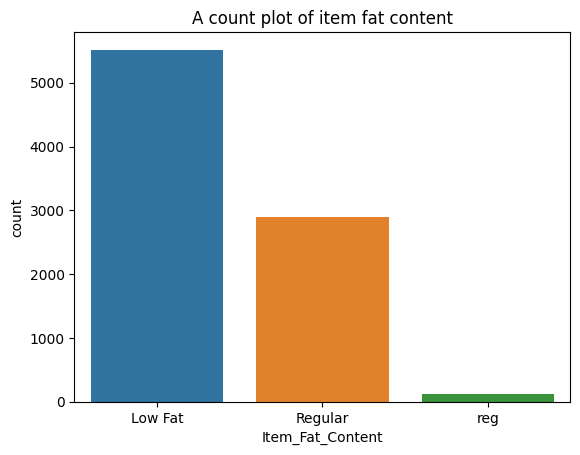

In [57]:
#A count plot of item fat content
ax = sns.countplot(data=df, x='Item_Fat_Content')
ax.set_title('A count plot of item fat content');

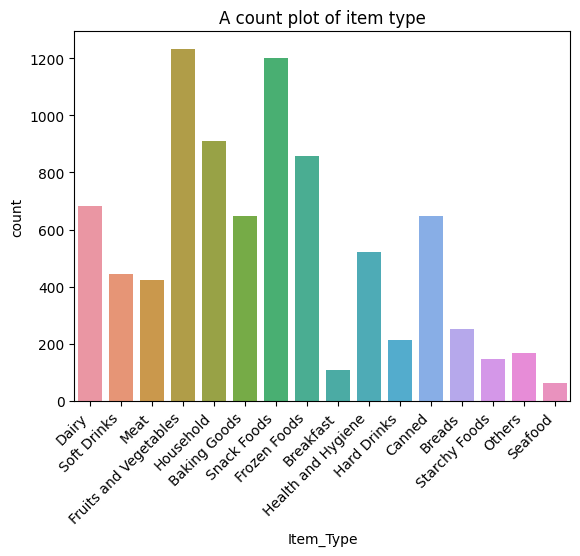

In [61]:
#A count plot of item type
ax = sns.countplot(data=df, x='Item_Type')
ax.set_title('A count plot of item type');
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');

In [65]:
#Heatmap to view the correlation between features.
df_correlation=df.corr(numeric_only=True)
df_correlation


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


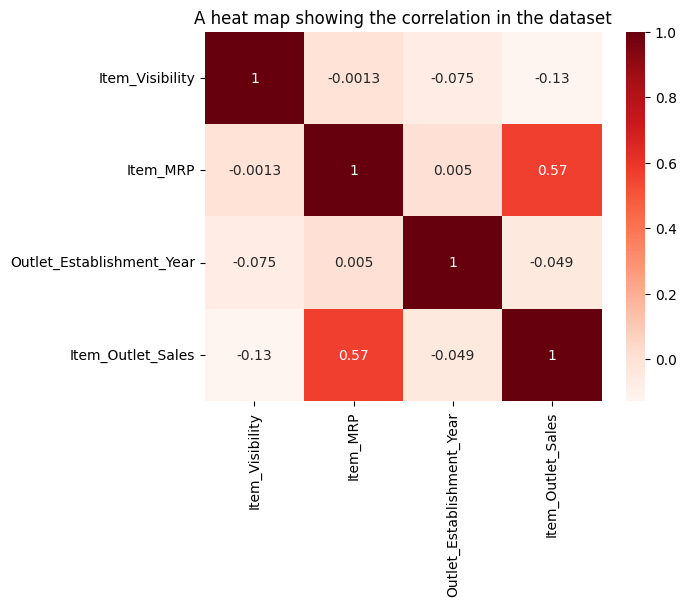

In [70]:
ax=sns.heatmap(df_correlation , cmap ='Reds',annot=True);
ax.set_title('A heat map showing the correlation in the dataset');

## Feature Inspection